In [38]:
import torch
from fastai.vision.all import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data from fastai
# Untar data form MNIST
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid')]

In [4]:
# Check train data
(path/'train'/'3').ls() # 3 and 7 (same)

(#6131) [Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/train/3/10091.png')...]

In [5]:
# Check validation data
(path/'valid'/'7').ls() # 7 and 3 (same)

(#1028) [Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/0.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1006.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1012.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1021.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1039.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1055.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1071.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1091.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1096.png'),Path('C:/Users/Mirsaid/.fastai/data/mnist_sample/valid/7/1100.png')...]

In [6]:
threes = (path/'train'/'3').ls() # 3
sevens = (path/'train'/'7').ls() # 7

In [24]:
# Check Pictures
img_sample = threes[100] # returns path
# open with PIL
img3 = Image.open(img_sample)
img3

In [25]:
# Check Pictures
img_sample = sevens[200] # returns path
# open with PIL
img7 = Image.open(img_sample)
img7

In [28]:
# image to numbers using torch
tensor(img7)[4:10, 4:10],tensor(img3)[4:10, 4:10] # example

(tensor([[  0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,  18],
         [ 47,  47,  47,  47,  47, 197],
         [252, 252, 252, 252, 252, 252]], dtype=torch.uint8),
 tensor([[  0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   8, 134],
         [  0,   0,  27, 132, 196, 253],
         [  8, 133, 233, 253, 253, 253],
         [ 36, 253, 253, 253, 223, 182],
         [ 36, 253, 253, 222,  41,   0]], dtype=torch.uint8))

In [29]:
# Visualization
img_3_t = tensor(img3)
df = pd.DataFrame(img_3_t)
df.style.set_properties(**{'font-size':'gpy'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,8,134,254,254,254,254,255,202,21,8,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,27,132,196,253,253,253,253,253,253,253,253,195,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,8,133,233,253,253,253,253,253,253,253,253,253,253,253,238,141,11,0,0,0,0,0,0,0
8,0,0,0,0,36,253,253,253,223,182,182,163,65,65,65,172,252,253,253,253,140,0,0,0,0,0,0,0
9,0,0,0,0,36,253,253,222,41,0,0,0,0,0,0,0,165,253,253,253,170,0,0,0,0,0,0,0


In [36]:
# Tensors
threes_tr = [tensor(Image.open(x)) for x in threes]
sevens_tr = [tensor(Image.open(x)) for x in sevens]
len(threes_tr), len(sevens_tr)

(6131, 6265)

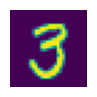

In [46]:
show_image(threes_tr[2])
plt.show()

In [47]:
# Stacking
stacked_threes = torch.stack(threes_tr).float()/255
stacked_sevens = torch.stack(sevens_tr).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

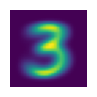

In [60]:
# Find ideal 3 and 7
ideal3 = stacked_threes.mean(0)
ideal7 = stacked_sevens.mean(0)
show_image(ideal3)
plt.show()

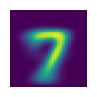

In [61]:
show_image(ideal7)
plt.show()

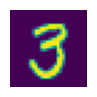

In [70]:
s_3 = stacked_threes[2] # sample
show_image(s_3) # Check whether number is near 3 or 7 by MAE and RMSE
plt.show()

In [71]:
# MAE
mae = (s_3 - ideal3).abs().mean()

# RMSE
rmse = ((s_3-ideal3)**2).mean().sqrt()

mae, rmse

(tensor(0.1100), tensor(0.1980))

In [72]:
# MAE
mae = (s_3 - ideal7).abs().mean()

# RMSE
rmse = ((s_3-ideal7)**2).mean().sqrt()

mae, rmse

(tensor(0.1541), tensor(0.2974))

In [75]:
# In one cell
def predict(test):
    # Calculate by RMSE (most commonly used)
    rmse3 = ((test - ideal3)**2).mean().sqrt()
    rmse7 = ((test - ideal7)**2).mean().sqrt()
    if rmse3 > rmse7:
        return 7
    elif rmse3 < rmse7:
        return 3
# Check sample
predict(s_3)

3

In [86]:
# Get sample from validation and check it
tests = (path/'valid'/'7').ls()
tests_tr = [tensor(Image.open(x)) for x in tests]
predict(tests_tr[1000].float()/255)

7

In [109]:
# Checking accuracy with whole validation
valid3 = (torch.stack([tensor(Image.open(x)) for x in (path/'valid'/'3').ls()])).float()/255
valid7 = torch.stack([tensor(Image.open(x)) for x in (path/'valid'/'7').ls()]).float()/255
valid3.shape, valid7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [111]:
def mae(test, train):
    return (test - train).abs().mean(dim=(-1, -2))
mae(valid3, ideal3)

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

In [116]:
# Accuracy
def is_3(test):
    return mae(test, ideal3) < mae(test, ideal7)
def is_7(test):
    return mae(test, ideal3) > mae(test, ideal7)
# When convert True/False to float it will be 1/0
print(f"Accuracy: {(is_3(valid3).float().mean() + is_7(valid7).float().mean())/2}")

Accuracy: 0.951120138168335
